# Predicting COVID-19 Outbreaks to Support SDG 3 (Good Health and Well-being)

# Import necessary libraries and load data

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [47]:
df = pd.read_csv('owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350080,ZWE,Africa,Zimbabwe,2023-10-14,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
350081,ZWE,Africa,Zimbabwe,2023-10-15,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
350082,ZWE,Africa,Zimbabwe,2023-10-16,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
350083,ZWE,Africa,Zimbabwe,2023-10-17,265808.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [48]:
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [49]:
print("Columns:", df.columns.tolist())

Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'

In [50]:
# countries & columns for prediction
features = ['date','location','total_cases', 'new_cases', 'total_vaccinations', 'population', 'people_vaccinated']
countries = ['Africa', 'United_States', 'India', 'United_Kingdom', 'Germany']
df = df[df['location'].isin(countries)][features]

In [51]:
df

,date,location,total_cases,new_cases,total_vaccinations,population,people_vaccinated
1385,2020-01-03,Africa,NaN,0.0,NaN,1.426737e+09,NaN
1386,2020-01-04,Africa,NaN,0.0,NaN,1.426737e+09,NaN
1387,2020-01-05,Africa,NaN,0.0,NaN,1.426737e+09,NaN
1388,2020-01-06,Africa,NaN,0.0,NaN,1.426737e+09,NaN
1389,2020-01-07,Africa,NaN,0.0,NaN,1.426737e+09,NaN
...,...,...,...,...,...,...,...
141158,2023-10-19,India,NaN,NaN,2.206746e+09,1.417173e+09,1.027419e+09
141159,2023-10-20,India,NaN,NaN,2.206747e+09,1.417173e+09,1.027419e+09
141160,2023-10-21,India,NaN,NaN,2.206747e+09,1.417173e+09,1.027419e+09
141161,2023-10-22,India,NaN,NaN,2.206747e+09,1.417173e+09,1.027419e+09


In [52]:
# data types and missing values
print("\nData Info:\n")
df.info()


Data Info:

<class 'pandas.core.frame.DataFrame'>
Index: 4160 entries, 1385 to 141162
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                4160 non-null   object 
 1   location            4160 non-null   object 
 2   total_cases         4083 non-null   float64
 3   new_cases           4152 non-null   float64
 4   total_vaccinations  2820 non-null   float64
 5   population          4160 non-null   float64
 6   people_vaccinated   2820 non-null   float64
dtypes: float64(5), object(2)
memory usage: 260.0+ KB


In [53]:
# percentage of missing values per column
missing_values = df.isnull().mean() * 100
print("\nMissing Values (%):\n", missing_values[missing_values > 0])


Missing Values (%):
 total_cases            1.850962
new_cases              0.192308
total_vaccinations    32.211538
people_vaccinated     32.211538
dtype: float64


In [54]:
# convert date to datetime 
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_year'] = df['date'].dt.dayofyear

In [55]:
# handling missing values
df['total_vaccinations'] = df['total_vaccinations'].fillna(0)
df['people_vaccinated'] = df['people_vaccinated'].fillna(0)
df['total_cases'] = df['total_cases'].fillna(0)
df['new_cases'] = df['new_cases'].fillna(df['new_cases'].mean())

In [56]:
df.isnull().sum()

date                  0
location              0
total_cases           0
new_cases             0
total_vaccinations    0
population            0
people_vaccinated     0
year                  0
month                 0
day                   0
day_of_year           0
dtype: int64

In [57]:
df

,date,location,total_cases,new_cases,total_vaccinations,population,people_vaccinated,year,month,day,day_of_year
1385,2020-01-03,Africa,0.0,0.000000,0.000000e+00,1.426737e+09,0.000000e+00,2020,1,3,3
1386,2020-01-04,Africa,0.0,0.000000,0.000000e+00,1.426737e+09,0.000000e+00,2020,1,4,4
1387,2020-01-05,Africa,0.0,0.000000,0.000000e+00,1.426737e+09,0.000000e+00,2020,1,5,5
1388,2020-01-06,Africa,0.0,0.000000,0.000000e+00,1.426737e+09,0.000000e+00,2020,1,6,6
1389,2020-01-07,Africa,0.0,0.000000,0.000000e+00,1.426737e+09,0.000000e+00,2020,1,7,7
...,...,...,...,...,...,...,...,...,...,...,...
141158,2023-10-19,India,0.0,23254.694364,2.206746e+09,1.417173e+09,1.027419e+09,2023,10,19,292
141159,2023-10-20,India,0.0,23254.694364,2.206747e+09,1.417173e+09,1.027419e+09,2023,10,20,293
141160,2023-10-21,India,0.0,23254.694364,2.206747e+09,1.417173e+09,1.027419e+09,2023,10,21,294
141161,2023-10-22,India,0.0,23254.694364,2.206747e+09,1.417173e+09,1.027419e+09,2023,10,22,295


In [58]:
print(df.head())
print("\nShape:", df.shape)

           date location  total_cases  new_cases  total_vaccinations  \
1385 2020-01-03   Africa          0.0        0.0                 0.0   
1386 2020-01-04   Africa          0.0        0.0                 0.0   
1387 2020-01-05   Africa          0.0        0.0                 0.0   
1388 2020-01-06   Africa          0.0        0.0                 0.0   
1389 2020-01-07   Africa          0.0        0.0                 0.0   

        population  people_vaccinated  year  month  day  day_of_year  
1385  1.426737e+09                0.0  2020      1    3            3  
1386  1.426737e+09                0.0  2020      1    4            4  
1387  1.426737e+09                0.0  2020      1    5            5  
1388  1.426737e+09                0.0  2020      1    6            6  
1389  1.426737e+09                0.0  2020      1    7            7  

Shape: (4160, 11)


# Feature engineering and target variable

In [59]:
# Create lagged features (e.g., previous 7 days of total_cases and new_cases)
for lag in range (1, 8):
    df[f'total_cases_lag_{lag}'] = df.groupby('location')['total_cases'].shift(lag)
    df[f'new_cases_lag_{lag}'] = df.groupby('location')['new_cases'].shift(lag)


In [60]:
# vaccination rate
df['vaccination_rate'] = df['people_vaccinated'] / df['population'] * 100

In [61]:
# Drop rows with NaN from lags
df = df.dropna()
df

,date,location,total_cases,new_cases,total_vaccinations,population,people_vaccinated,year,month,day,...,new_cases_lag_3,total_cases_lag_4,new_cases_lag_4,total_cases_lag_5,new_cases_lag_5,total_cases_lag_6,new_cases_lag_6,total_cases_lag_7,new_cases_lag_7,vaccination_rate
1392,2020-01-10,Africa,0.0,0.000000,0.000000e+00,1.426737e+09,0.000000e+00,2020,1,10,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1393,2020-01-11,Africa,0.0,0.000000,0.000000e+00,1.426737e+09,0.000000e+00,2020,1,11,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1394,2020-01-12,Africa,0.0,0.000000,0.000000e+00,1.426737e+09,0.000000e+00,2020,1,12,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1395,2020-01-13,Africa,0.0,0.000000,0.000000e+00,1.426737e+09,0.000000e+00,2020,1,13,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1396,2020-01-14,Africa,0.0,0.000000,0.000000e+00,1.426737e+09,0.000000e+00,2020,1,14,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141158,2023-10-19,India,0.0,23254.694364,2.206746e+09,1.417173e+09,1.027419e+09,2023,10,19,...,0.000000,44999588.0,27.000000,44999561.0,51.0,44999510.0,37.0,44999473.0,35.0,72.497772
141159,2023-10-20,India,0.0,23254.694364,2.206747e+09,1.417173e+09,1.027419e+09,2023,10,20,...,0.000000,44999588.0,0.000000,44999588.0,27.0,44999561.0,51.0,44999510.0,37.0,72.497774
141160,2023-10-21,India,0.0,23254.694364,2.206747e+09,1.417173e+09,1.027419e+09,2023,10,21,...,0.000000,44999588.0,0.000000,44999588.0,0.0,44999588.0,27.0,44999561.0,51.0,72.497776
141161,2023-10-22,India,0.0,23254.694364,2.206747e+09,1.417173e+09,1.027419e+09,2023,10,22,...,23254.694364,44999588.0,0.000000,44999588.0,0.0,44999588.0,0.0,44999588.0,27.0,72.497779


In [62]:
# Features and target variable
X = df[['total_cases', 'total_vaccinations', 'vaccination_rate', 'year', 'month', 'day', 'day_of_year'] + 
       [f'total_cases_lag_{lag}' for lag in range(1, 8)] + 
       [f'new_cases_lag_{lag}' for lag in range(1, 8)]]
y = df['new_cases']

In [63]:
# splitting the data by country to avoid leakage
X_list, y_list = [], []
for country in countries:
    mask = df['location'] == country
    X_country = X[mask].values
    y_country = y[mask].values
    X_list.append(X_country)
    y_list.append(y_country)

# Combine and split into train/test
X = np.vstack(X_list)
y = np.concatenate(y_list)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
print("X_train Shape:", X_train)
print("X_test Shape:", X_test)

X_train Shape: [[-0.53677869 -0.4024947  -0.69233636 ... -0.2330088  -0.15329985
  -0.20986933]
 [ 0.78491011 -0.43265347  1.47963266 ... -0.27394591 -0.25510299
   7.46746599]
 [-0.34761277 -0.11535222 -0.39680612 ... -0.17574624 -0.07311938
  -0.17245086]
 ...
 [-0.98907548 -0.68252541 -0.97533347 ... -0.27394591 -0.25510299
   1.14892849]
 [ 1.04380294 -0.42820319  1.48198241 ... -0.27394591 -0.25510299
  -0.26038256]
 [-0.31748565 -0.02822332 -0.29968785 ... -0.15503688 -0.14834111
  -0.13306359]]
X_test Shape: [[ 1.0046738  -0.4290678   1.48174792 ... -0.27394591 -0.25510299
  -0.26038256]
 [-0.26627493  0.45459222  0.22323552 ... -0.27394591 -0.25510299
  -0.26038256]
 [-0.6518225  -0.59359789 -0.87883521 ...  0.11450591  0.13347704
   0.22074649]
 ...
 [ 1.26973436 -0.68252541 -0.97533347 ... -0.27394591 -0.25510299
  -0.26038256]
 [ 1.22436122 -0.4216967   1.4835928  ... -0.27394591 -0.25510299
  -0.26038256]
 [-1.03174525 -0.68252541 -0.97533347 ... -0.12915326 -0.14020069
  -

# Model Selection & Training

In [67]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
# predicting on test set
y_pred = model.predict(X_test)

In [69]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 399143096.99
R-squared Score: 0.96


In [70]:
feature_names = (
	['total_cases', 'total_vaccinations', 'vaccination_rate', 'year', 'month', 'day', 'day_of_year'] +
	[f'total_cases_lag_{lag}' for lag in range(1, 8)] +
	[f'new_cases_lag_{lag}' for lag in range(1, 8)]
)
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': model.feature_importances_
})
print("\nFeature Importance:\n", feature_importance.sort_values('importance', ascending=False).head())


Feature Importance:
                feature  importance
20     new_cases_lag_7    0.910624
14     new_cases_lag_1    0.015571
2     vaccination_rate    0.009794
7    total_cases_lag_1    0.008553
1   total_vaccinations    0.007362


# Model Evaluation & Visualization

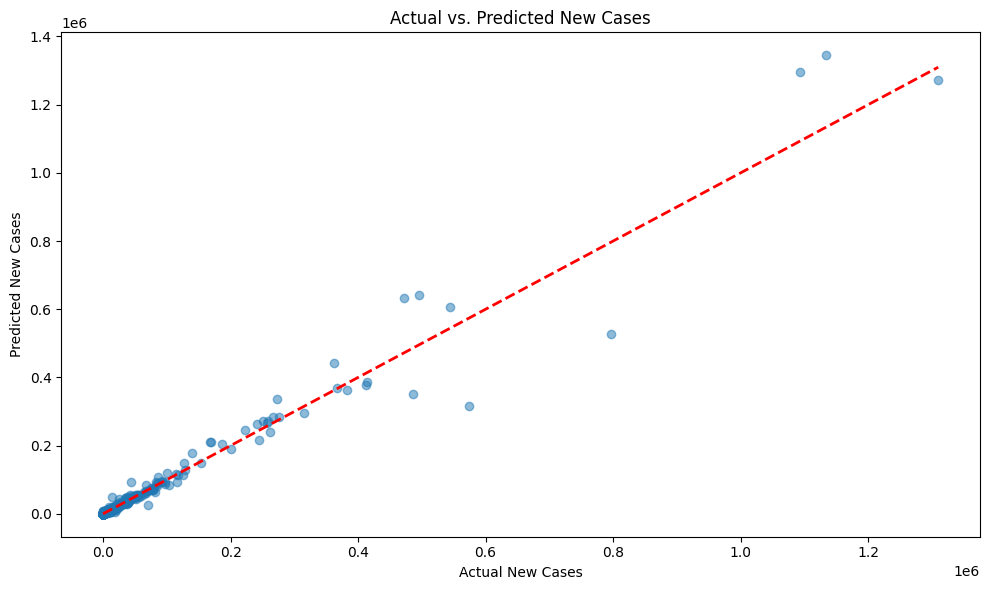

In [71]:
# actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual New Cases')
plt.ylabel('Predicted New Cases')
plt.title('Actual vs. Predicted New Cases')
plt.tight_layout()
plt.show()

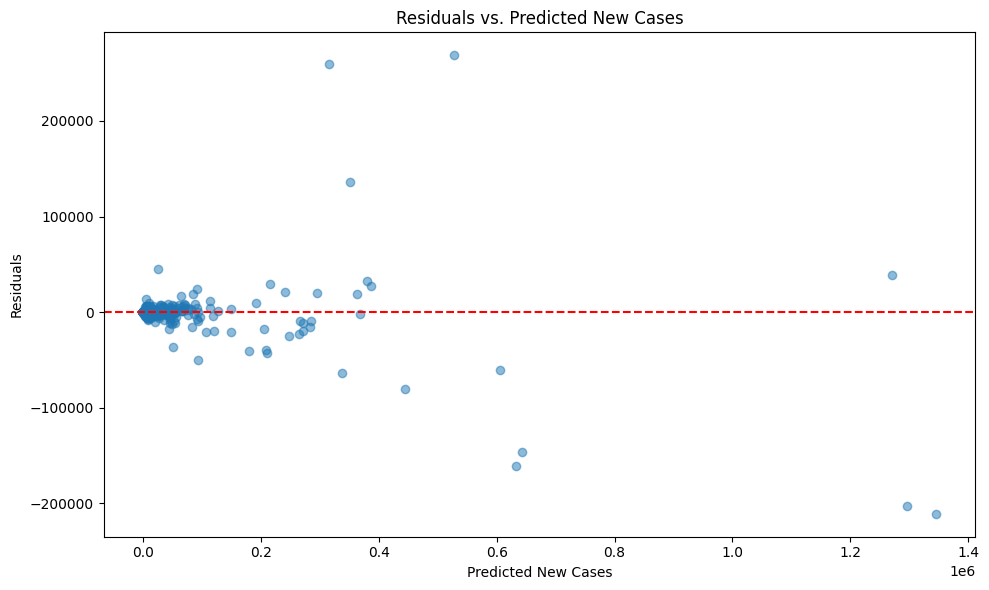

In [72]:
# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted New Cases')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted New Cases')
plt.tight_layout()
plt.show()

# Hyperparameter Tuning & Final Model

In [73]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

In [74]:
# Grid search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [10, 20, ...], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [75]:
print("Best Estimator:", grid_search.best_estimator_)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Estimator: RandomForestRegressor(n_estimators=200, random_state=42)
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.9752436930049854


In [76]:
# Best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Model:", best_model)


Best Model: RandomForestRegressor(n_estimators=200, random_state=42)


In [77]:
# Evaluate best model
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print(f"Best Model - Mean Squared Error: {best_mse:.2f}")
print(f"Best Model - R-squared Score: {best_r2:.2f}")
print(f"Best Parameters: {grid_search.best_params_}")

Best Model - Mean Squared Error: 393594688.91
Best Model - R-squared Score: 0.96
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


# Time-Series Forecasting with LSTM

In [78]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


In [79]:
#time series data
seq_length = 14

def create_sequences(df, seq_length):
    X, y = [], []
    for i in range(len(df) - seq_length):
        X.append(df[i:(i + seq_length)])
        y.append(df[i + seq_length])
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences(df['new_cases'].values, seq_length)
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

## Reshape for LSTM (samples, timesteps, features)
X_train_seq =  X_train_seq.reshape((X_train_seq.shape[0], seq_length, 1))
X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], seq_length, 1))

print(" Long Short-Term Memory X shape:", X_seq.shape)
print("Long Short-Term Memory y shape:", y_seq)

 Long Short-Term Memory X shape: (4125, 14)
Long Short-Term Memory y shape: [    0.             0.             0.         ... 23254.69436416
 23254.69436416 23254.69436416]


In [80]:
model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape = (seq_length, 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
model_lstm.fit(X_train_seq,
               y_train_seq,
               epochs=20,
               verbose=1)

Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 10278857728.0000
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7953320960.0000
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5618401792.0000
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6083998720.0000
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8598532096.0000
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5373438976.0000
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5547810816.0000
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4381394432.0000
Epoch 9/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3857973504.0000
Epoch 10/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8138112000.0000
Epoch 11/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2590819072.0000
Epoch 12/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3927065344.0000
Epoch 13/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1360978176.0000
Ep

In [82]:
#  Predict and evaluate
y_pred_lstm = model_lstm.predict(X_test_seq)
print(f"LSTM RMSE: {np.sqrt(mean_squared_error(y_test_seq, y_pred_lstm))}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
LSTM RMSE: 23151.22917320508


In [84]:
import joblib
joblib.dump(best_model, 'covid_new_cases_model.pkl')

['covid_new_cases_model.pkl']